In [1]:
import os
import time
from datetime import date
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options


In [2]:
class AmazonProductScraper:
    def __init__(self):
        self.driver = None

    def open_browser(self):
        
        opt = Options()

        opt.add_argument("--disable-infobars")
        opt.add_argument("--disable-extensions")
        opt.add_argument('--log-level=OFF')
        opt.add_experimental_option('excludeSwitches', ['enable-logging'])

        url = "https://www.amazon.in/"
        self.driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=opt)
        
        self.driver.get(url)
        print("\n>> The browser is open")

       
        time.sleep(3)

    def get_product_url(self):

        search_product_name = input(">> Enter the product to be searched: ").replace(" ", "+")

       
        product_url = "https://www.amazon.in/s?k={}&ref=nb_sb_noss"

        product_url = product_url.format(search_product_name)

        print(">> Product URL: ", product_url)

        
        self.driver.get(product_url)
        
        return [product_url, search_product_name, search_product_name]

    def extract_webpage_information(self):
       
        soup = BeautifulSoup(self.driver.page_source, 'html.parser')
        
        search_results = soup.find_all('div', {'data-component-type': 's-search-result'})

        return search_results

    @staticmethod
    def extract_product_information(search_results):
        temporary_record = []
        for i in range(len(search_results)):
            item = search_results[i]

            
            atag_item = item.h2.a

           
            description = atag_item.text.strip()

            
            product_url = "https://www.amazon.in/" + atag_item.get('href')
            
            try:
                product_review = item.i.text.strip()
            except AttributeError:
                product_review = "N/A"
            try:
                review_number = item.find('span', {'class': 'a-size-base'}).text
            except AttributeError:
                review_number = "N/A"    
            product_information = (product_review, review_number, product_url)

            
            temporary_record.append(product_information)
    
        return temporary_record

    def navigate_to_other_pages(self, product_details):
        
        records = []

        product_url = product_details[0]
        search_product_name = product_url[1]

        print("\n>> Page 1 - webpage information extracted")

        max_number_of_pages = "(//li[@class='a-disabled'])[3]"

        number_of_pages = self.driver.find_element_by_xpath(max_number_of_pages)

        for i in range(2, int(number_of_pages.text)+1):
            
            next_page_url = product_url+ "&page=" + str(i)
            self.driver.get(next_page_url)

            
            search_results = self.extract_webpage_information()
            temporary_record = self.extract_product_information(search_results)

            extraction_information = ">> Page {} - webpage information extracted"
            print(extraction_information.format(i))

            for j in temporary_record:
                records.append(j)

        self.driver.close()

        return records

    @staticmethod
    def product_information_spreadsheet(records, product_details):

        today = date.today().strftime("%d-%m-%Y")

        for _ in records:

            searched_product = product_details[-1]

            file_name = "{}_{}.csv".format(searched_product, today)
            f = open(file_name, "w", newline='', encoding='utf-8')
            writer = csv.writer(f)
            writer.writerow(['Rating', 'Review Count', 'Product URL'])
            writer.writerows(records)
            f.close()

        message = ("\n>> Information about the product '{}' is stored in {}").format(searched_product, file_name)

        print(message)

        os.startfile(file_name)    

In [4]:

if __name__ == "__main__":

    my_amazon_bot = AmazonProductScraper()

    my_amazon_bot.open_browser()

    product_details = my_amazon_bot.get_product_url()

    my_amazon_bot.extract_product_information(my_amazon_bot.extract_webpage_information())

    navigation = my_amazon_bot.navigate_to_other_pages(product_details)

    my_amazon_bot.product_information_spreadsheet(navigation, product_details)



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\DELL\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache
<ipython-input-2-7021d1f933e1>:15: DeprecationWarning: use options instead of chrome_options
  self.driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=opt)



>> The browser is open
>> Enter the product to be searched: laptop
>> Product URL:  https://www.amazon.in/s?k=laptop&ref=nb_sb_noss

>> Page 1 - webpage information extracted
>> Page 2 - webpage information extracted
>> Page 3 - webpage information extracted
>> Page 4 - webpage information extracted
>> Page 5 - webpage information extracted
>> Page 6 - webpage information extracted
>> Page 7 - webpage information extracted
>> Page 8 - webpage information extracted
>> Page 9 - webpage information extracted
>> Page 10 - webpage information extracted
>> Page 11 - webpage information extracted
>> Page 12 - webpage information extracted
>> Page 13 - webpage information extracted
>> Page 14 - webpage information extracted
>> Page 15 - webpage information extracted
>> Page 16 - webpage information extracted
>> Page 17 - webpage information extracted
>> Page 18 - webpage information extracted
>> Page 19 - webpage information extracted
>> Page 20 - webpage information extracted

>> Information

In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('laptop_05-06-2021.csv')

In [14]:
df.head()

,Rating,Review Count,Product URL
0,4.1 out of 5 stars,19,https://www.amazon.in//gp/slredirect/picassoRe...
1,3.6 out of 5 stars,71,https://www.amazon.in//gp/slredirect/picassoRe...
2,3.6 out of 5 stars,3,https://www.amazon.in//HP-245-1S5E8PA-ATHLON-3...
3,NaN,More Buying Choices,https://www.amazon.in//HP-Laptop-366C6PA-Ryzen...
4,3.8 out of 5 stars,43,https://www.amazon.in//Lenovo-10-1-inch-Touchs...


In [15]:
df.shape


(321, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        253 non-null    object
 1   Review Count  254 non-null    object
 2   Product URL   321 non-null    object
dtypes: object(3)
memory usage: 7.6+ KB


In [17]:
df.isnull().sum()

Rating          68
Review Count    67
Product URL      0
dtype: int64

In [18]:
df=df.drop(columns=["Product URL"], axis=1)

In [19]:
df.isnull().sum()

Rating          68
Review Count    67
dtype: int64

In [20]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Review Count']=df['Review Count'].fillna(df['Review Count'].mode()[0])

In [21]:
df.isnull().sum()

Rating          0
Review Count    0
dtype: int64

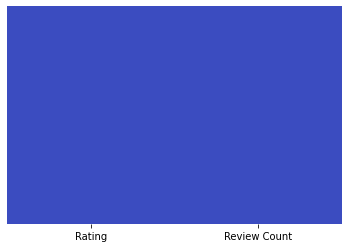

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [24]:
df.describe()

,Rating,Review Count
count,321,321
unique,31,123
top,4.4 out of 5 stars,1
freq,94,78


In [33]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [34]:
df_cor=df.corr()
df_cor

,Rating,Review Count
Rating,1.000000,-0.200388
Review Count,-0.200388,1.000000


In [35]:
df.skew()

Rating         -1.082332
Review Count    0.279433
dtype: float64

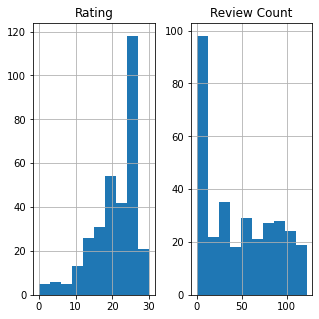

In [37]:
df.hist(figsize=(5,5))
plt.show()

In [38]:
from scipy.stats import skew
skew(df['Rating'].dropna())

-1.077267778127409

In [40]:
from scipy import stats
p_value=stats.shapiro(df['Rating'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    print('null hyp of normality is accepted')


null hyp of normality is accepted


In [43]:
x=df.iloc[:,0:-1]
x.head()

,Rating
0,22
1,17
2,17
3,25
4,19


In [45]:
y=df.iloc[:,-1]
y.head()

0     32
1    104
2     58
3    122
4     75
Name: Review Count, dtype: int64

In [46]:
x.shape

(321, 1)

In [47]:
y.shape

(321,)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [49]:
x_train.shape

(215, 1)

In [50]:
y_train.shape

(215,)

In [51]:
x_test.shape

(106, 1)

In [52]:
y_test.shape

(106,)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
lr.coef_

array([-1.11757421])

In [56]:
lr.intercept_

66.6663702088593

In [57]:
lr.score(x_train,y_train)


0.0343360121898042

In [58]:
label=lr.predict(x_test)
print('Predicted Rating:',label)
print('actual Rating',y_test)

Predicted Rating: [39.84458917 43.1973118  54.3730539  43.1973118  42.07973759 46.55003443
 52.13790548 52.13790548 39.84458917 38.72701496 44.31488601 54.3730539
 47.66760864 46.55003443 38.72701496 47.66760864 38.72701496 44.31488601
 46.55003443 51.02033127 44.31488601 46.55003443 38.72701496 56.60820232
 45.43246022 37.60944075 49.90275706 51.02033127 49.90275706 51.02033127
 62.19607337 61.07849916 46.55003443 46.55003443 38.72701496 38.72701496
 45.43246022 38.72701496 65.548796   38.72701496 36.49186654 42.07973759
 38.72701496 47.66760864 33.13914391 38.72701496 47.66760864 48.78518285
 38.72701496 33.13914391 46.55003443 40.96216338 52.13790548 46.55003443
 39.84458917 33.13914391 38.72701496 38.72701496 38.72701496 36.49186654
 44.31488601 47.66760864 38.72701496 35.37429233 38.72701496 43.1973118
 38.72701496 46.55003443 39.84458917 48.78518285 39.84458917 38.72701496
 38.72701496 38.72701496 51.02033127 37.60944075 55.49062811 40.96216338
 44.31488601 49.90275706 47.6676086

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,label))
print('Mean squared error:',mean_squared_error(y_test,label))


error:
Mean absolute error: 36.54933487354261
Mean squared error: 1702.3403705368519


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,label))

0.016306637998919737


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.00503611926246752

In [62]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [63]:
model=[LinearRegression(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.0343360121898042
Error:
Mean absolute error: 36.54933487354261
Mean squared error: 1702.3403705368519
r2_score: 0.016306637998919737
***************************************************************


Score of DecisionTreeRegressor() is: 0.278362882365526
Error:
Mean absolute error: 31.995544569424286
Mean squared error: 1482.5717234070148
r2_score: 0.14329943162538017
***************************************************************




In [64]:
model=[Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Ridge() is: 0.03433601174190004
Error:
Mean absolute error: 36.549356627026235
Mean squared error: 1702.3455866074848
r2_score: 0.016303623904825426
***************************************************************


Score of ElasticNet() is: 0.03431787270850295
Error:
Mean absolute error: 36.5537126015214
Mean squared error: 1703.4101970097383
r2_score: 0.015688441298609135
***************************************************************




In [65]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.2725392676103907


Mean absolute error: 31.756331735147775
Mean squared error: 1462.511862063922


r2_score: 0.1548909751189057


In [66]:
from sklearn.linear_model import Lasso
model=[Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Lasso() is: 0.034319431280706914
Error:
Mean absolute error: 36.55352030765051
Mean squared error: 1703.3623547171878
r2_score: 0.015716086854350775
***************************************************************




In [67]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.033891722257489154


Mean absolute error: 36.48806100578563
Mean squared error: 1708.1541302117691


r2_score: 0.012947170703503375


In [69]:
import joblib
joblib.dump(rf,'df.csv')

['df.csv']